In [ ]:
!pip install tensorflow

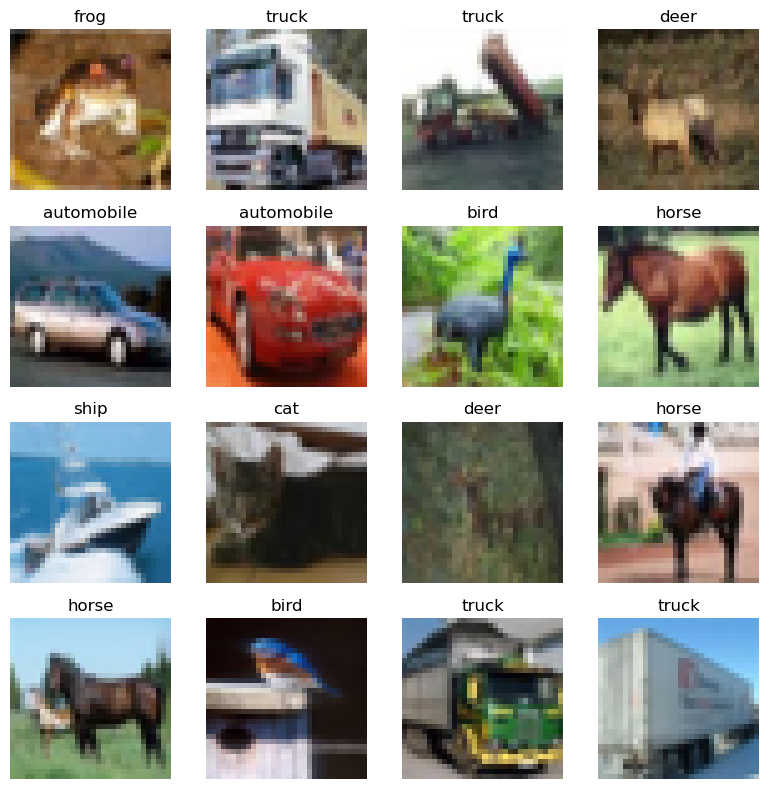

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the pixel values to the range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert the class labels to one-hot encoding for model training (but keep the original y_train for visualization)
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)


# Visualizing some CIFAR-10 images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def plot_sample_images(X, y, class_names, num_images=16):
    plt.figure(figsize=(8, 8))
    for i in range(num_images):
        plt.subplot(4, 4, i + 1)
        plt.imshow(X[i])
        plt.title(class_names[int(y[i][0])])  # Extract scalar from the 2D array and convert to int
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display the first 16 images from the training set
plot_sample_images(X_train, y_train, class_names)

In [125]:
# Defining the CNN model with 3 hidden layers and different activation functions
model = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),  # ReLU for the first layer
    MaxPooling2D(pool_size=(2, 2)),  # MaxPooling reduces the spatial dimensions (width and height) of the feature maps
    
    Conv2D(64, (3, 3), activation='tanh'),  # Tanh function for the second layer
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='sigmoid'),  # Sigmoid function for the third layer
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),  # ReLU function for the fully connected layer
    Dense(10, activation='softmax')  # Softmax function for the output layer (10 classes)
])
# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model (use one-hot encoded labels)
history = model.fit(X_train, y_train_one_hot, validation_data=(X_test, y_test_one_hot), epochs=10, batch_size=64)

# Evaluating the model
test_loss, test_acc = model.evaluate(X_test, y_test_one_hot)
print(f'Test accuracy: {test_acc:.4f}')

#The accuracy increases gradually over the epochs, indicating that the model is learning and improving its performance

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 51ms/step - accuracy: 0.3014 - loss: 1.8846 - val_accuracy: 0.4957 - val_loss: 1.3915
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.5217 - loss: 1.3367 - val_accuracy: 0.5886 - val_loss: 1.1671
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.5865 - loss: 1.1571 - val_accuracy: 0.6108 - val_loss: 1.1331
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.6398 - loss: 1.0254 - val_accuracy: 0.6498 - val_loss: 1.0016
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.6707 - loss: 0.9402 - val_accuracy: 0.6647 - val_loss: 0.9661
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.6930 - loss: 0.8739 - val_accuracy: 0.6613 - val_loss: 0.9770
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.7158 - loss: 0.8098 - val_accuracy: 0.6856 - val_loss: 0.9299
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.7370 - loss: 0.7595 - 

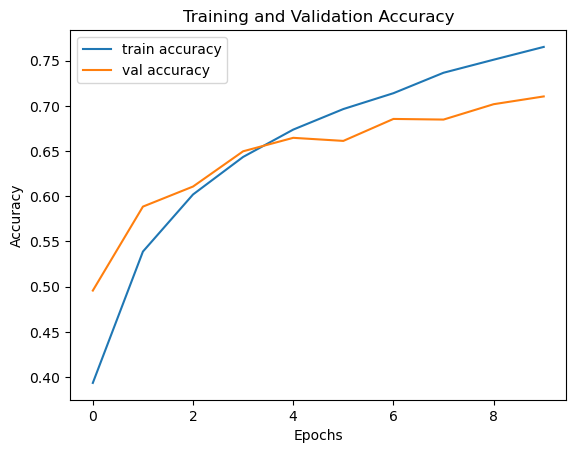

In [127]:
# Plotting the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


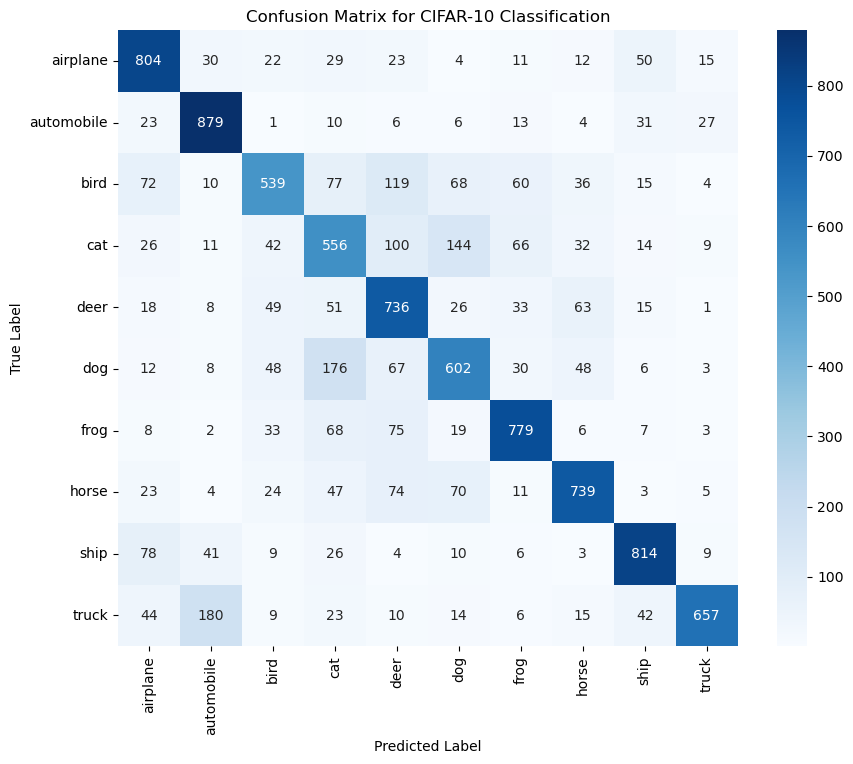

In [129]:
# Predicting the labels for the test set
y_pred = np.argmax(model.predict(X_test), axis=1)

# Get true labels
y_true = np.squeeze(y_test)  # Make sure to squeeze y_test if it's in the shape (n_samples, 1)

# Calculating the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plotting the confusion matrix with class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for CIFAR-10 Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [131]:
# Calculating precision, recall, and F1-score
precision = precision_score(y_true, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_true, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_true, y_pred, average='weighted', zero_division=1)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

Precision: 0.7176
Recall: 0.7105
F1-Score: 0.7098


In [133]:
# Defining the CNN model with 0 hidden layers
model = Sequential([
    Input(shape=(32, 32, 3)),  # Specify the input shape here
    Conv2D(32, (3, 3), activation='relu'),  # ReLU for the first layer
    MaxPooling2D(pool_size=(2, 2)),  # MaxPooling reduces the spatial dimensions (width and height) of the feature maps
    Flatten(),
    Dense(10, activation='softmax')  # Softmax function for the output layer (10 classes)
])

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model (use one-hot encoded labels)
history = model.fit(X_train, y_train_one_hot, validation_data=(X_test, y_test_one_hot), epochs=10, batch_size=64)

# Evaluating the model
test_loss, test_acc = model.evaluate(X_test, y_test_one_hot)
print(f'Test accuracy: {test_acc:.4f}')

#Accuracy is likely to be lower without hidden layers

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.3837 - loss: 1.7311 - val_accuracy: 0.5234 - val_loss: 1.3623
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5510 - loss: 1.2902 - val_accuracy: 0.5535 - val_loss: 1.2688
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5782 - loss: 1.2099 - val_accuracy: 0.5804 - val_loss: 1.2069
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.6106 - loss: 1.1264 - val_accuracy: 0.6016 - val_loss: 1.1540
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.6312 - loss: 1.0713 - val_accuracy: 0.6032 - val_loss: 1.1400
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.6526 - loss: 1.0146 - val_accuracy: 0.6212 - val_loss: 1.1039
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.6702 - loss: 0.9581 - val_accuracy: 0.6134 - val_loss: 1.1096
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.6800 - loss: 0.9420 - 

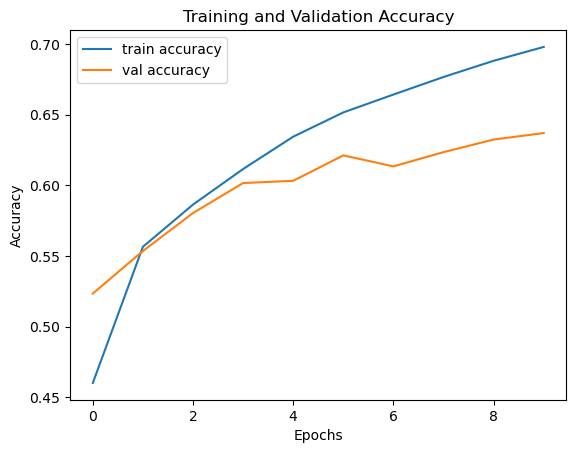

In [135]:
# Plotting the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


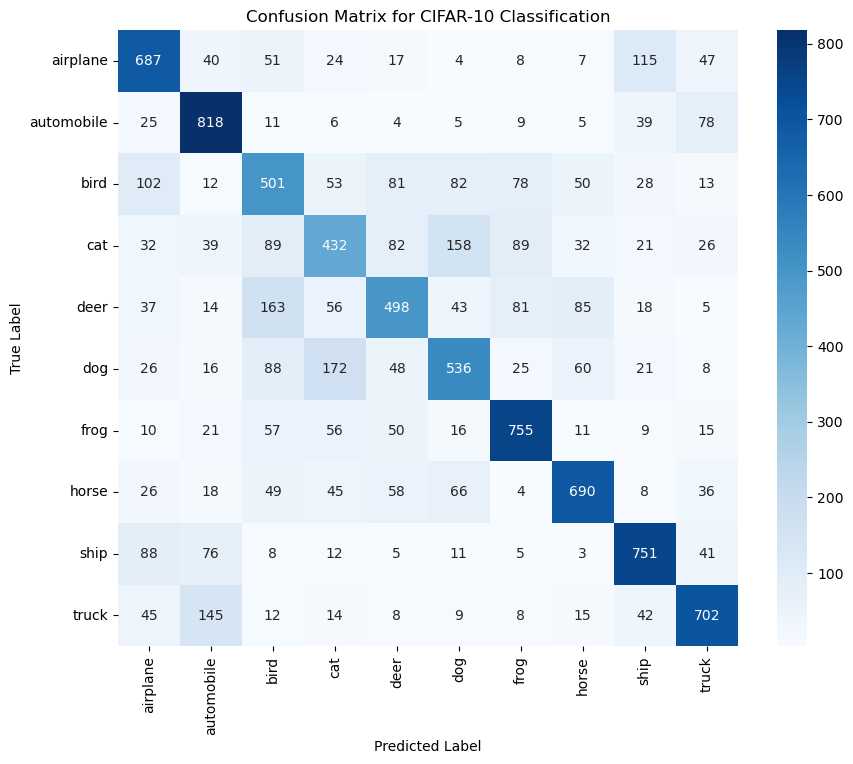

In [137]:
# Predicting the labels for the test set
y_pred = np.argmax(model.predict(X_test), axis=1)

# Get true labels
y_true = np.squeeze(y_test)  # Make sure to squeeze y_test if it's in the shape (n_samples, 1)

# Calculating the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plotting the confusion matrix with class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for CIFAR-10 Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [139]:
# Calculating precision, recall, and F1-score
precision = precision_score(y_true, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_true, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_true, y_pred, average='weighted', zero_division=1)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

Precision: 0.6333
Recall: 0.6370
F1-Score: 0.6336


In [141]:
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.layers import LeakyReLU

# Defining a function to adjust the learning rate
def schedule(epoch, lr):
    if epoch > 5:  # After 5 epochs, decrease the learning rate
        lr = lr * tf.math.exp(-0.1)  # Exponential decay
    return float(lr)  # Convert to a native float before returning

# Creating the learning rate scheduler callback
lr_scheduler = LearningRateScheduler(schedule)

# Defining the CNN model with one hidden layer
model = Sequential([
    Input(shape=(32, 32, 3)),  # Use Input layer for defining the input shape
    Conv2D(32, (3, 3), activation='relu'),  # First convolutional layer with ReLU
    MaxPooling2D(pool_size=(2, 2)),  # Max pooling layer
    Flatten(),  # Flatten the output for the fully connected layer
    Dense(128),  # Dense layer without activation function
    LeakyReLU(negative_slope=0.1),  # Leaky ReLU activation function with a slope of 0.1 for negative values
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model with the learning rate scheduler
history = model.fit(X_train, y_train_one_hot, validation_data=(X_test, y_test_one_hot), 
                    epochs=10, batch_size=64, callbacks=[lr_scheduler])

# Evaluating the model
test_loss, test_acc = model.evaluate(X_test, y_test_one_hot)
print(f'Test accuracy: {test_acc:.4f}')

# The average accuracy with one hidden layer is better than with no hidden layers, 
# but not as good as with multiple hidden layers. Additionally, the adjustable learning rate 
# allows for a faster increase in accuracy, highlighting the importance of tuning the learning 
# rate for model convergence.


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.4161 - loss: 1.6233 - val_accuracy: 0.5663 - val_loss: 1.2073 - learning_rate: 0.0010
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.6025 - loss: 1.1408 - val_accuracy: 0.6090 - val_loss: 1.1142 - learning_rate: 0.0010
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.6596 - loss: 0.9682 - val_accuracy: 0.6257 - val_loss: 1.0735 - learning_rate: 0.0010
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.7055 - loss: 0.8431 - val_accuracy: 0.6441 - val_loss: 1.0282 - learning_rate: 0.0010
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.7466 - loss: 0.7373 - val_accuracy: 0.6526 - val_loss: 1.0168 - learning_rate: 0.0010
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.7821 - loss: 0.6314 - val_accuracy: 0.6609 - val_loss: 1.0155 - learning_rate: 0.0010
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.8202 - l

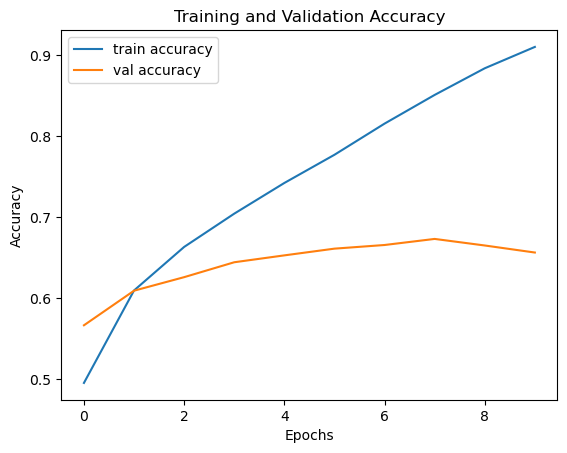

In [143]:
# Plotting the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


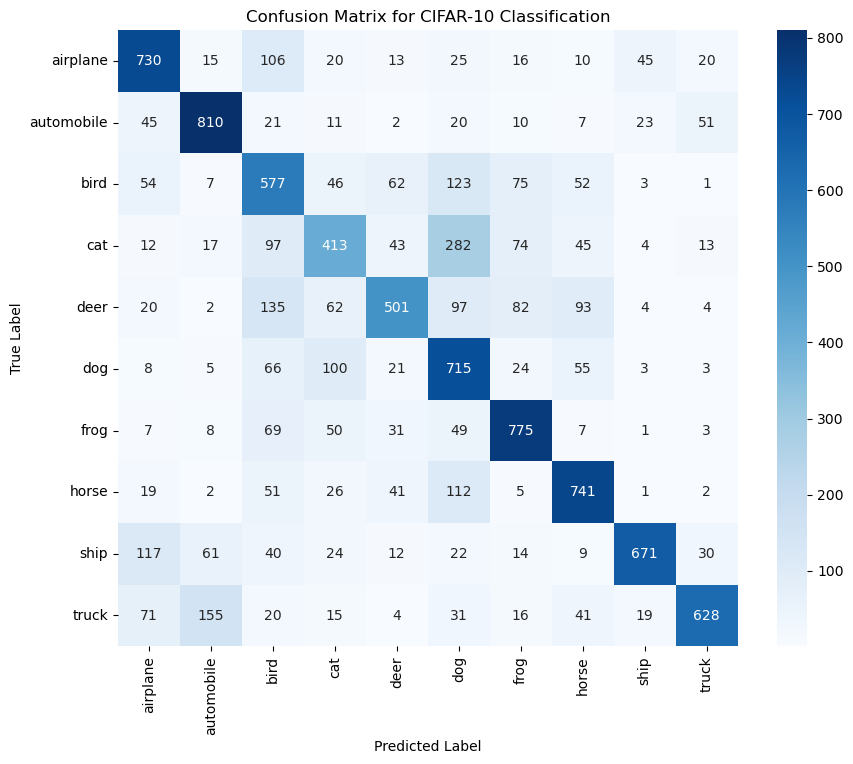

In [145]:
# Predicting the labels for the test set
y_pred = np.argmax(model.predict(X_test), axis=1)

# Get true labels
y_true = np.squeeze(y_test)  # Make sure to squeeze y_test if it's in the shape (n_samples, 1)

# Calculating the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plotting the confusion matrix with class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for CIFAR-10 Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [147]:
# Calculating precision, recall, and F1-score
precision = precision_score(y_true, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_true, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_true, y_pred, average='weighted', zero_division=1)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

Precision: 0.6728
Recall: 0.6561
F1-Score: 0.6565
